In [1]:
___Author___='LumberJack Jyss'

In [2]:
import pandas as pd
import pandas_datareader as web
import quandl
import numpy as np
from scipy.optimize import minimize
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(palette='bright',style='whitegrid') #["deep", "muted", "pastel", "bright", "dark", "colorblind"]

In [3]:
# help(stats.linregress)

In [4]:
spy_etf=web.DataReader('SPY','yahoo') # will give an index

In [5]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2319 entries, 2010-01-04 to 2019-03-21
Data columns (total 6 columns):
High         2319 non-null float64
Low          2319 non-null float64
Open         2319 non-null float64
Close        2319 non-null float64
Volume       2319 non-null float64
Adj Close    2319 non-null float64
dtypes: float64(6)
memory usage: 126.8 KB


In [6]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,94.130867
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,94.380074
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,94.446495
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,94.845207
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,95.160805


In [7]:
# Ce n'est pas le S&P mais juste un indicateur d'un exchange trade fund (etf).
start = pd.to_datetime('2010-01-04') # On récupère la date de début par .head()
end = pd.to_datetime('2019-03-15') # On récupère la date de fin par .tail()

In [8]:
aapl=web.DataReader('AAPL','yahoo',start,end)

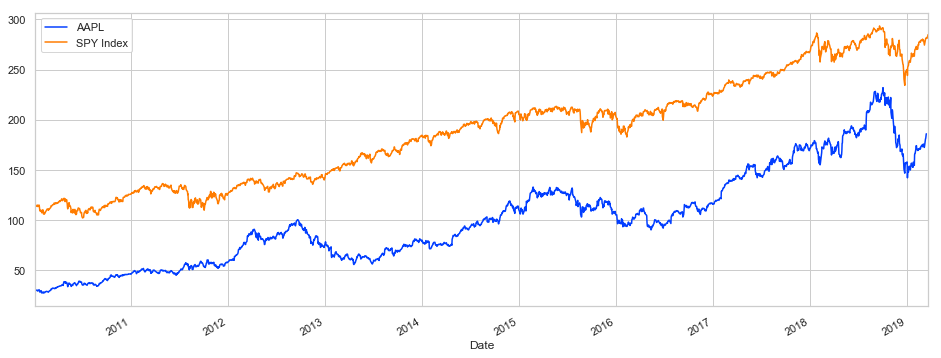

In [9]:
aapl['Close'].plot(label='AAPL',figsize=(16,6))
spy_etf['Close'].plot(label='SPY Index',figsize=(16,6))
plt.legend()

In [10]:
aapl['Cumulative']=aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative']=spy_etf['Close']/spy_etf['Close'].iloc[0]

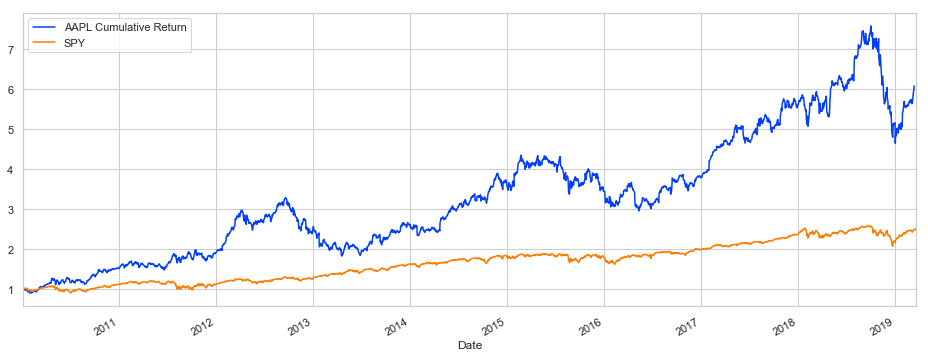

In [11]:
aapl['Cumulative'].plot(label='AAPL Cumulative Return', figsize=(16,6))
spy_etf['Cumulative'].plot(label='SPY')
plt.legend()

In [12]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

ValueError: x and y must be the same size

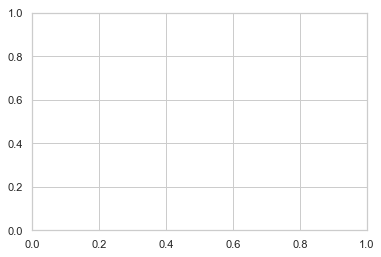

In [13]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha=0.25)
# S'il y a une parfaite corrélation, on observe une droite bien claire

In [14]:
# On passe par une RL
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],\
                                                      spy_etf['Daily Return'].iloc[1:])

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
beta

In [ ]:
alpha # Close to zéro, but not

In [ ]:
r_value # valeur bof

# On va créer du bruit artificilement pour mieux comprendre

In [ ]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))
noise

In [ ]:
fake_stock = spy_etf[et_return].iloc[1:]+noise

In [ ]:
# Scfake r splot one other the other
plt.scatter(fake_stock,etf_spy,alpha=0.25)
# Forcéement, on s'attend à une droite très marquée, car on veut prouver que le 

In [ ]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Value'].ilc[1:],\
etf_spy['Daily Value'])

In [ ]:
beta #  almost 1 because 

In [ ]:
alpha # very small

In [ ]:
# => LE MODELE FONCTIONNE. Le but sera donc d'augmenter vraiment le alpha